# Lab 4.1: Likelihood

One way to estimate parameters for a distribution is to calculate the likelihood of the parameter values given the data that we observe.

The likelihood of a parameter $\theta$ is given by the notion $\mathcal{L}(\theta)$ which has the same/similar form as the probability function $p(data \mid \theta)$.

### Question 1

The file `outage.csv` contains the number of power outages Kampala (Ugandan city) experiences each month for the past 72 months

1. Read in the `https://s3-us-west-2.amazonaws.com/dsci/6002/data/outage.csv` using pandas
2. Plot the data on a histogram 
  - Set `normed=True` to get the probability density histogram
  - Set `bins=20` to get smaller bins for the histogram

3.  What distribution would you consider fitting the data to given the nature of the data ?
  - Think about if the data is discrete or continuous 
  - Think about what the data describes

4. Write down the equation that would model the random variable in question with the distribution you have chosen

   For example:
   - $\text{Let X be the number of heads in 5 coin flips}$
   - $X \sim Binomial(n, p)$

5. Write down the likelihood function to calculate the likelihood of a given parameter value 

   **Hint**:
   - A **parameter** of the binomial distribution will be `n` or `p` for example
   - This will be based on the distribution you have chosen above
   - The likelihood function would be the product of the probabilities for each data point 
  
6. Write a python function that will calculate the likelihood of a parameter given the data
   - The function will take a parameter and the data
   - Use `scipy.stats` and `numpy.product()`
 
7. Define a range of possible values for the parameter from `14` to `21` (using `numpy.linspace`).

   Calculate the likelihood for each of the values defined in the range.
   
   Plot the values ($x$) against the likelihood ($L(\theta)$)  

8. Write a function to calculate the log-likelihood.

9. Find the maximum likelihood estimate for the parameter of interest (use `numpy.argmax`)

In [2]:
%pylab inline
import pandas as pd
# import wget

# filename = wget.download('https://s3-us-west-2.amazonaws.com/dsci/6002/data/outage.csv')
# wget.download('https://s3-us-west-2.amazonaws.com/dsci/6002/data/outage.csv', bar=bar_thermometer)

df = pd.read_csv('https://s3-us-west-2.amazonaws.com/dsci/6002/data/outage.csv')

Populating the interactive namespace from numpy and matplotlib


In [3]:
# for x in df['0']:
#     print(x)

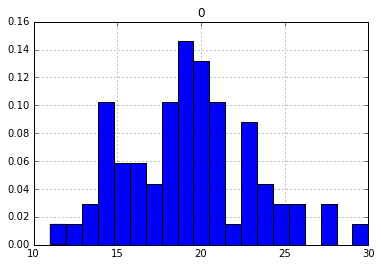

In [4]:
df.hist(normed=True, bins = 20);

fit the data to a Poisson distribution because it describes the number of times an event happens over a discrete time period.

Let X be the number of power outages in a month.

Then X ~ Poisson(lambda).  P(X=k) = lambda**k * e**-lambda / k!

The likelihood function is L(lambda) = product over k for n observations $[lambda**k * e**-lambda / k!]$.



In [5]:
from scipy.stats import poisson

In [6]:
#     The function will take a parameter and the data
#     Use scipy.stats and numpy.product()

# calculate the likelihood of a parameter given the data
def calc_likelihood(data, lam):
    likelihoods = [poisson(lam).pmf(x) for x in data]
    return np.prod(likelihoods)


# def find_likelihood_of_lambda(p,data):
#     '''function retursn the likelihood of a parameter given the data and a parameter'''
#     #return poisson.pmf(p,int(mean(data)))
#     data['prob']= data.apply(lambda x: poisson.pmf(p,x))
#     return np.prod(data['prob'])

# find_likelihood_of_lambda(p= 19,data = outage)

# p = linspace(14, 21, 99)
# plot(p, [find_likelihood_of_lambda(x,outage)for x in p]);

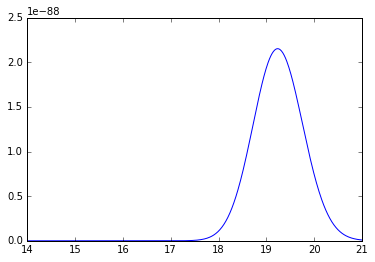

In [7]:
p = linspace(14, 21, 500)
v = []
for x in p:
    v.append(calc_likelihood(df['0'],x))
plot(p, v);

Write a function to calculate the log-likelihood.

19.2324649299 -201.861227876


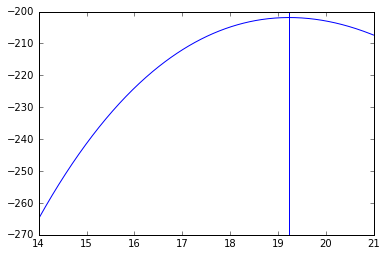

In [10]:
def find_log_likelihood(p,data):
    '''function returns the log_likelihood of the function'''
    #return poisson.pmf(p,int(mean(data)))
    data['prob']= data.apply(lambda x: log(poisson.pmf(p,x)))
    return np.sum(data['prob'])

# p = linspace(14, 21, 99)
# find_log_likelihood(p[argmax([find_log_likelihood(x,outage) for x in p])],outage) 

log_likelihoods = log(v)
plot(p, log_likelihoods)

max_index = argmax(log_likelihoods)
axvline(x = p[max_index])

print(p[max_index], log_likelihoods[max_index])

In [11]:
# Find the maximum likelihood estimate for the parameter of interest (use numpy.argmax)

print(p[max_index], log_likelihoods[max_index])  # The maximum likelihood estimate for lambda is 19.23.

19.2324649299 -201.861227876


### Question 2

The file `plants.csv` contains heights to 1,000 plants. You are told the data resembles a normal distribution with a standard deviation of 3cm.

1. Read in `https://s3-us-west-2.amazonaws.com/dsci/6002/data/plant.csv` using pandas and plot the data on a histogram
   
2. Define a range of possible values for the mean (from 32 to 42)
  
3. Calculate the log-liklihood for each of the values in the range 
  
4. Plot the log-likelihood function

5. Find the MLE for the mean

,0
count,1000.000000
mean,40.017209
std,2.873319
min,32.022567
25%,38.087044
50%,40.086478
75%,41.942700
max,48.214524


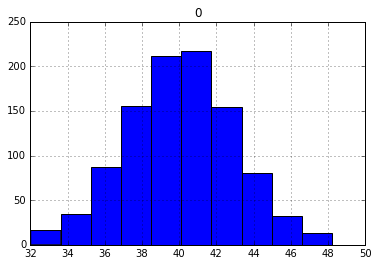

In [36]:
df = pd.read_csv('https://s3-us-west-2.amazonaws.com/dsci/6002/data/plant.csv')
df.hist();

mu = linspace(32, 42, 100)

df.head()
df.describe()

In [18]:
from scipy.stats import norm


# calculate the likelihood of a parameter given the data
# def calc_likelihood(data, mu):
#     likelihoods = [norm(mu).pdf(x) for x in data]
#     return np.prod(likelihoods)
def find_norm_log_likelihood(p,data):
    '''function returns the log_likelihood of the function'''
    #return poisson.pmf(p,int(mean(data)))
    data['prob']= data.apply(lambda x: log(norm(p, 3).pdf(x)))
    return np.sum(data['prob'])


# Plot a likelihood function

# v = []
# for x in mu:
#     v.append(calc_likelihood(df['0'],x))
# plot(mu, v);

In [21]:
from scipy.stats import norm
[find_norm_log_likelihood(x,df) for x in mu]

[-6046.625357685906,
 -5957.212296066378,
 -5868.932905614206,
 -5781.787186329359,
 -5695.775138211855,
 -5610.896761261693,
 -5527.1520554788685,
 -5444.541020863393,
 -5363.063657415266,
 -5282.719965134466,
 -5203.5099440210015,
 -5125.433594074894,
 -5048.49091529612,
 -4972.681907684689,
 -4898.006571240603,
 -4824.464905963849,
 -4752.056911854446,
 -4680.782588912378,
 -4610.641937137654,
 -4541.634956530271,
 -4473.761647090224,
 -4407.022008817515,
 -4341.416041712162,
 -4276.943745774141,
 -4213.605121003465,
 -4151.400167400127,
 -4090.328884964132,
 -4030.391273695476,
 -3971.5873335941633,
 -3913.9170646601933,
 -3857.380466893561,
 -3801.977540294269,
 -3747.7082848623213,
 -3694.5727005977064,
 -3642.5707875004587,
 -3591.702545570525,
 -3541.9679748079375,
 -3493.367075212696,
 -3445.899846784795,
 -3399.566289524235,
 -3354.3664034310154,
 -3310.300188505141,
 -3267.3676447466023,
 -3225.5687721554086,
 -3184.903570731552,
 -3145.3720404750384,
 -3106.974181385869,
 -

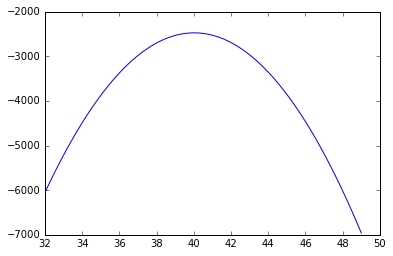

In [29]:
plot(mu, [find_norm_log_likelihood(x,df) for x in mu]);

In [39]:
# Find the MLE for the mean
find_norm_log_likelihood(mu[argmax([find_norm_log_likelihood(x,df) for x in mu])],df) 

-2475.83435632161